In [1163]:
import pandas as pd
import numpy as np
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [1164]:
df = pd.read_csv('titanic.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [1165]:
#sumaryzacja

print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [1166]:
#brakujące dane

print(df.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64


In [1167]:
# unique values in categorical columns

categorical_columns = ['sex', 'embarked', 'pclass']
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in sex: ['female' 'male']
Unique values in embarked: ['S' 'C' nan 'Q']
Unique values in pclass: [1 2 3]


In [1168]:
#użycie boat i body spowodowałoby wyciek danych i usuwamy nie potrzebne kolumny

df = df.drop(columns=['ticket', 'cabin', 'boat', 'body', 'home_dest'])

In [1169]:
#analizie danych przed uzupeł. kolumny age

def extract_title(name):
    if pd.isnull(name):
        return "Unknown"
    return name.split(',')[1].split('.')[0].strip()

df['Title'] = df['name'].apply(extract_title)

age_stats = df.groupby(['sex', 'Title'])['age'].aggregate(['count', 'mean', 'median']).dropna()
print(age_stats)

                     count       mean  median
sex    Title                                 
female Dona              1  39.000000    39.0
       Dr                1  49.000000    49.0
       Lady              1  48.000000    48.0
       Miss            210  21.774207    22.0
       Mlle              2  24.000000    24.0
       Mme               1  24.000000    24.0
       Mrs             170  36.994118    35.5
       Ms                1  28.000000    28.0
       the Countess      1  33.000000    33.0
male   Capt              1  70.000000    70.0
       Col               4  54.000000    54.5
       Don               1  40.000000    40.0
       Dr                6  42.666667    47.0
       Jonkheer          1  38.000000    38.0
       Major             2  48.500000    48.5
       Master           53   5.482704     4.0
       Mr              581  32.252151    29.0
       Rev               8  41.250000    41.5
       Sir               1  49.000000    49.0


In [1170]:
#uzupełnienie wieku

age_fill_values = {
    ('female', 'Miss', 0): df[(df['sex'] == 'female') & (df['Title'] == 'Miss') & (df['parch'] == 0)]['age'].mean(),
    ('male', 'Master', None): df[df['Title'] == 'Master']['age'].mean(),
    ('mixed', 'Mature', None): df[df['Title'].isin(['Sir', 'Mr', 'Ms', 'Mrs'])]['age'].mean(),
    ('mixed', 'Dr', None): df[df['Title'] == 'Dr']['age'].mean(),
    ('female', None, None): df[df['sex'] == 'female']['age'].mean(),
    ('male', None, None): df[df['sex'] == 'male']['age'].mean()
}

def fill_age(row):
    if pd.isnull(row['age']):
        if row['sex'] == 'female' and row['Title'] == 'Miss' and row['parch'] == 0:
            return age_fill_values[('female', 'Miss', 0)]
        elif row['sex'] == 'male' and row['Title'] == 'Master':
            return age_fill_values[('male', 'Master', None)]
        elif row['Title'] in ['Sir', 'Mr', 'Ms', 'Mrs']:
            return age_fill_values[('mixed', 'Mature', None)]
        elif row['Title'] == 'Dr':
            return age_fill_values[('mixed', 'Dr', None)]
        elif row['sex'] == 'female':
            return age_fill_values[('female', None, None)]
        elif row['sex'] == 'male':
            return age_fill_values[('male', None, None)]
    return row['age']

df['age'] = df.apply(fill_age, axis=1)

In [1171]:
df

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,211.3375,S,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,151.5500,S,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,151.5500,S,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,151.5500,S,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,151.5500,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,14.4542,C,Miss
1305,3,0,"Zabour, Miss. Thamine",female,27.216418,1,0,14.4542,C,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,7.2250,C,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,7.2250,C,Mr


In [1172]:
#trzy dodatkowe zmienne

#1
df['family_size'] = df['sibsp'] + df['parch'] + 1

#2
conditions = [
    df['age'] <= 6,
    (df['age'] > 6) & (df['age'] <= 12),
    (df['age'] > 12) & (df['age'] <= 18),
    df['age'] > 18
]
choices = ['Bobas', 'Dzieciak', 'Nastolatek', 'Dorosly']
df['age_range'] = np.select(conditions, choices, default='Unknown')

#3
df['mpc'] = df['age'] * df['pclass']

df


,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Title,family_size,age_range,mpc
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,211.3375,S,Miss,1,Dorosly,29.000000
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,151.5500,S,Master,4,Bobas,0.916700
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,151.5500,S,Miss,4,Bobas,2.000000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,151.5500,S,Mr,4,Dorosly,30.000000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,151.5500,S,Mrs,4,Dorosly,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,14.4542,C,Miss,2,Nastolatek,43.500000
1305,3,0,"Zabour, Miss. Thamine",female,27.216418,1,0,14.4542,C,Miss,2,Dorosly,81.649254
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,7.2250,C,Mr,1,Dorosly,79.500000
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,7.2250,C,Mr,1,Dorosly,81.000000


In [1173]:
#edycja metadanych

df.info()

df['survived'] = df['survived'].astype('category')
df['pclass'] = df['pclass'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['sex'] = df['sex'].astype('category')
df['fare'] = df['fare'].astype(float)
print("\n")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   name         1309 non-null   object 
 3   sex          1309 non-null   object 
 4   age          1309 non-null   float64
 5   sibsp        1309 non-null   int64  
 6   parch        1309 non-null   int64  
 7   fare         1308 non-null   float64
 8   embarked     1307 non-null   object 
 9   Title        1309 non-null   object 
 10  family_size  1309 non-null   int64  
 11  age_range    1309 non-null   object 
 12  mpc          1309 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0  

In [1174]:
#uzupełnienie brakujących danych

miss_val = df.isnull().sum()
print(miss_val[miss_val > 0])

fare        1
embarked    2
dtype: int64


In [1175]:
df.dropna(inplace=True)
miss_val = df.isnull().sum()
print(miss_val[miss_val > 0])

Series([], dtype: int64)


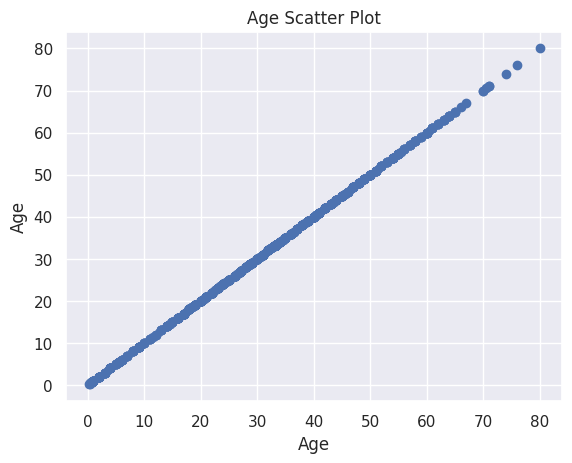

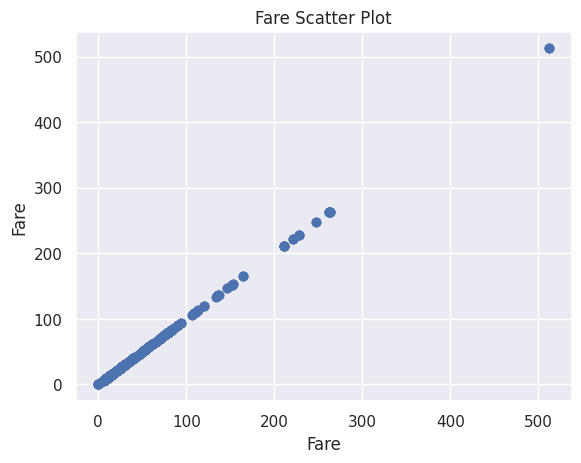


Updated Age and Fare Columns:

               age         fare
count  1306.000000  1306.000000
mean     30.137325    33.223956
std      13.062318    51.765986
min       0.166700     0.000000
25%      22.000000     7.895800
50%      30.000000    14.454200
75%      35.000000    31.275000
max      80.000000   512.329200


In [1176]:
#wykresy punktowe dla wieku i ceny biletu

plt.scatter(df['age'], df['age'])
plt.title('Age Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Age')
plt.show()


plt.scatter(df['fare'], df['fare'])
plt.title('Fare Scatter Plot')
plt.xlabel('Fare')
plt.ylabel('Fare')
plt.show()

print("\nUpdated Age and Fare Columns:\n")
print(df[['age', 'fare']].describe())


In [1177]:
# przycinanie odstających wartości dla age

age_mean = df.loc[df['age'] <= 67, 'age'].mean()
df.loc[df['age'] > 67, 'age'] = age_mean

# przycinanie odstających wartości dla fare

fare_threshold = df['fare'].quantile(0.99)
fare_mean = df.loc[df['fare'] <= fare_threshold, 'fare'].mean()
df.loc[df['fare'] > fare_threshold, 'fare'] = fare_mean

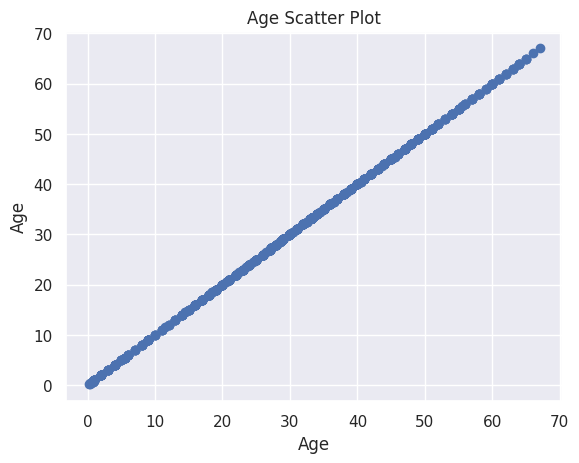

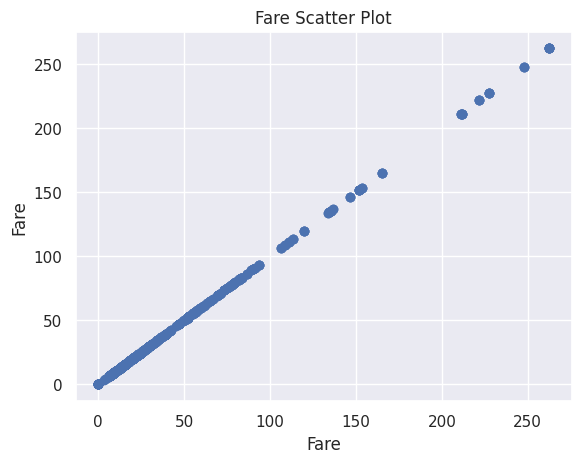


Updated Age and Fare Columns:

               age         fare
count  1306.000000  1306.000000
mean     29.874304    30.681458
std      12.622257    41.556902
min       0.166700     0.000000
25%      22.000000     7.895800
50%      30.000000    14.454200
75%      35.000000    30.681458
max      67.000000   262.375000


In [1178]:
#wykresy punktowe dla poprawionych wieku i ceny biletu

plt.scatter(df['age'], df['age'])
plt.title('Age Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Age')
plt.show()

plt.scatter(df['fare'], df['fare'])
plt.title('Fare Scatter Plot')
plt.xlabel('Fare')
plt.ylabel('Fare')
plt.show()


print("\nUpdated Age and Fare Columns:\n")
print(df[['age', 'fare']].describe())

In [1179]:
#normalizacja danych numerycznych

df = df.drop(columns=['name'])

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['Title'] = label_encoder.fit_transform(df['Title'])
df['age_range'] = label_encoder.fit_transform(df['age_range'])
df['embarked'] = label_encoder.fit_transform(df['embarked'])


In [1180]:
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [1181]:
print("\nNormalized dfset Preview:\n")
print(df.head())


Normalized dfset Preview:

  pclass survived  sex       age  sibsp     parch      fare  embarked  \
0      1        1  0.0  0.431421  0.000  0.000000  0.805479       1.0   
1      1        1  1.0  0.011222  0.125  0.222222  0.577608       1.0   
2      1        0  0.0  0.027431  0.125  0.222222  0.577608       1.0   
3      1        0  1.0  0.446384  0.125  0.222222  0.577608       1.0   
4      1        0  0.0  0.371571  0.125  0.222222  0.577608       1.0   

      Title  family_size  age_range       mpc  
0  0.529412          0.0   0.333333  0.128668  
1  0.470588          0.3   0.000000  0.001881  
2  0.529412          0.3   0.000000  0.006772  
3  0.705882          0.3   0.333333  0.133182  
4  0.764706          0.3   0.333333  0.110609  


In [1182]:
#wybór zmiennych predykcyjnych

selected_features = ['sex', 'age', 'pclass', 'fare', 'family_size', 'mpc']
X = df[selected_features]
y = df['survived']

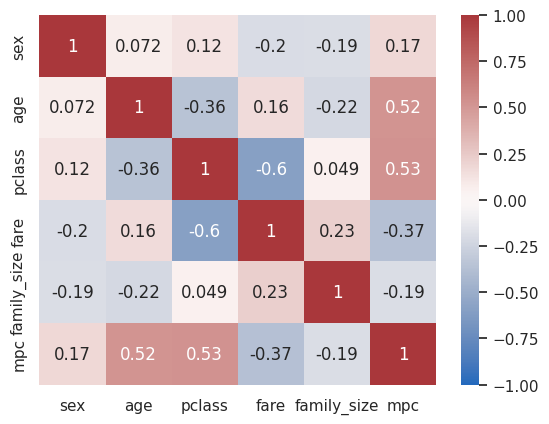

In [1183]:
sns.set()
plt.figure()
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1)
plt.show()

In [1184]:
#podzial w sposób losowy, 80% stanowią dane uczące

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1044, 6), (262, 6), (1044,), (262,))

In [1185]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

#MLP

mlp_model = MLPClassifier(random_state=42, max_iter=1000)
mlp_model.fit(X_train, y_train)


y_pred_mlp = mlp_model.predict(X_test)
print("MLP Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.2f}")
print(classification_report(y_test, y_pred_mlp))


MLP Classifier Results:
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       162
           1       0.88      0.67      0.76       100

    accuracy                           0.84       262
   macro avg       0.85      0.81      0.82       262
weighted avg       0.85      0.84      0.83       262



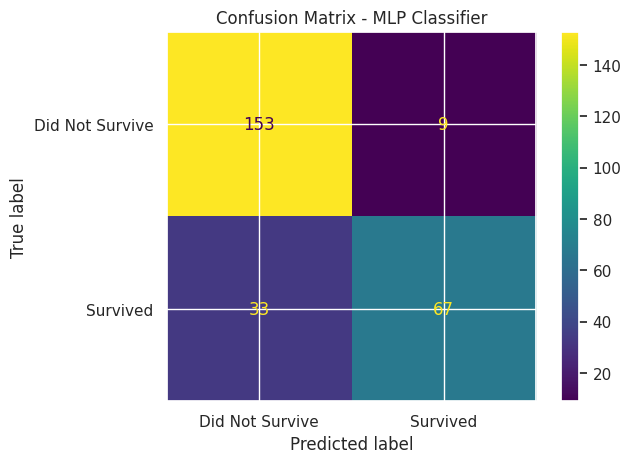

In [1186]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, display_labels=['Did Not Survive', 'Survived'])
plt.title("Confusion Matrix - MLP Classifier")
plt.show()

In [1187]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))



Random Forest Results:
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       162
           1       0.78      0.69      0.73       100

    accuracy                           0.81       262
   macro avg       0.80      0.79      0.79       262
weighted avg       0.81      0.81      0.81       262



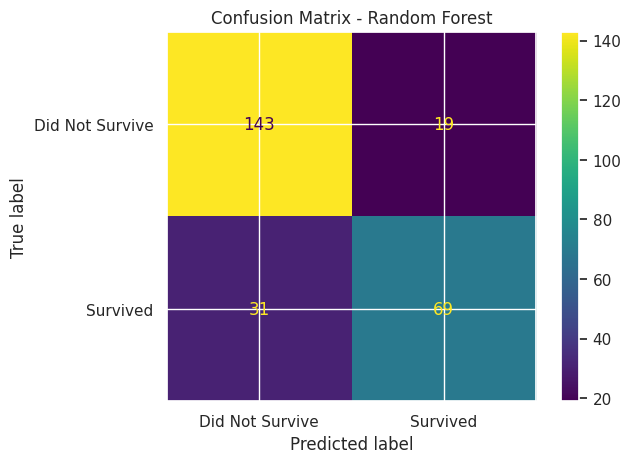

In [1188]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Did Not Survive', 'Survived'])
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [1189]:
from sklearn.linear_model import LogisticRegression

#logistic regression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       162
           1       0.79      0.65      0.71       100

    accuracy                           0.80       262
   macro avg       0.80      0.77      0.78       262
weighted avg       0.80      0.80      0.80       262



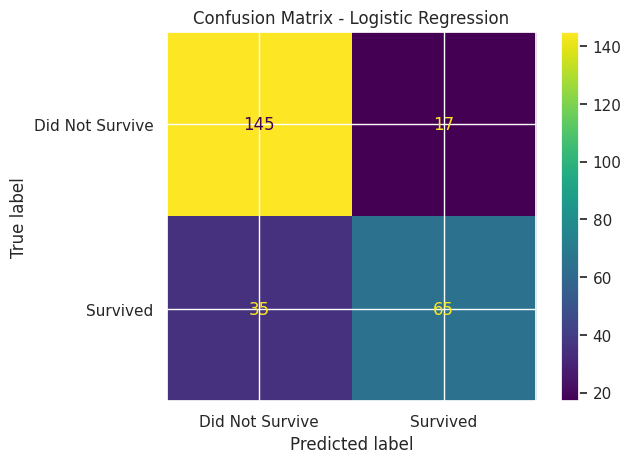

In [1190]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['Did Not Survive', 'Survived'])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [1191]:
from sklearn.neighbors import KNeighborsClassifier
#KNN

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)
print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(classification_report(y_test, y_pred_knn))


KNN Results:
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       162
           1       0.79      0.71      0.75       100

    accuracy                           0.82       262
   macro avg       0.81      0.80      0.80       262
weighted avg       0.82      0.82      0.81       262



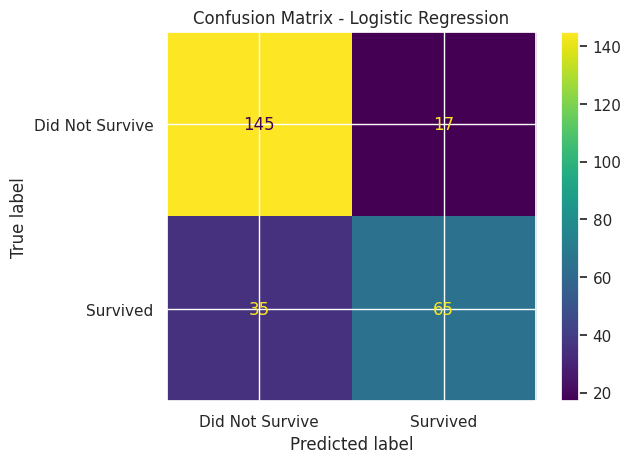

In [1192]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['Did Not Survive', 'Survived'])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

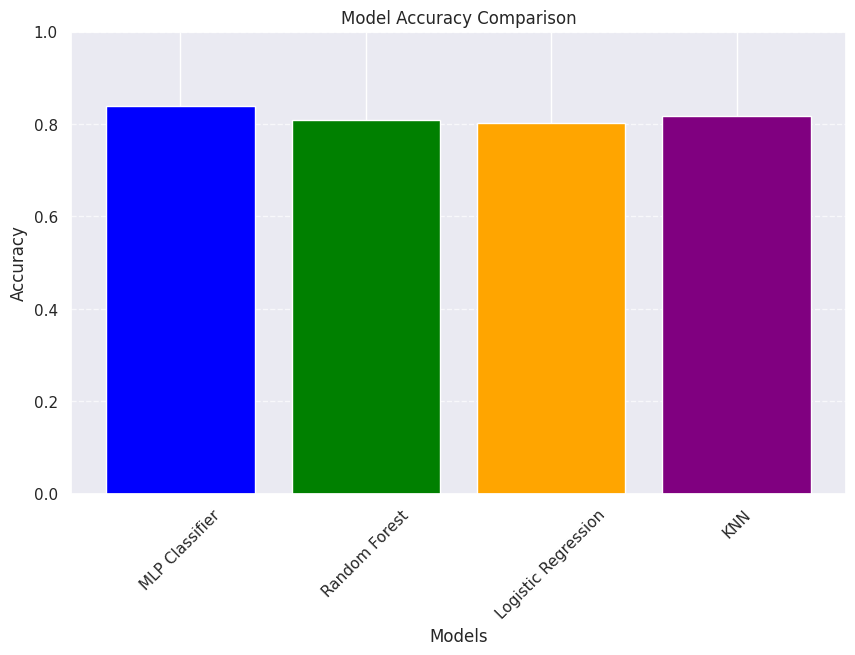

In [1193]:
#porównanie otrzymanych wyników

model_names = ['MLP Classifier', 'Random Forest', 'Logistic Regression', 'KNN']
accuracies = [
    accuracy_score(y_test, y_pred_mlp),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_knn)
]


plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
